# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
Perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

In [6]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


### Question 1: Appropriate test

Because we have two data sets but no population means, a 2-sample t-test is appropriate.

In [38]:
# number, % of callbacks for black-sounding names
b_call = sum(data[data.race=='b'].call)
b_n = len(data[data.race =='b'])
b_nocall = b_n - b_call
b_rate = b_call/(b_n)*100
print('calls, b: {}' .format(b_call))
print('no calls, b: {}' .format(b_nocall))
print('call rate (%), b: {}' .format(b_rate))

calls, b: 157.0
no calls, b: 2278.0
call rate (%), b: 6.447638603696099


In [39]:
# number, % of callbacks for white-sounding names
w_call = sum(data[data.race=='w'].call)
w_n = len(data[data.race =='w'])
w_nocall = w_n - w_call
w_rate = w_call/(w_n)*100
print('calls, w: {}' .format(w_call))
print('no calls, w: {}' .format(w_nocall))
print('call rate (%), w: {}' .format(w_rate))

calls, w: 235.0
no calls, w: 2200.0
call rate (%), w: 9.650924024640657


With sufficiently large samples (+2200 for each black-sounding and white-sounding names), we can approximate that the CLT applies.

### Question 2: Hypotheses

The core question is whether the name impacts call back rates for resumes. The null hypothesis is that there is no difference between call back rates for white vs. black sounding names.

H0: Callback rate for black-sounding names = Callback rate for white-sounding names

Ha: Callback rate for black-sounding names <> Callback rate for white-sounding names

### Question 3: Margin of error, CI, p-value

Bootstrap replicates for callback rate of white and black-sounding names. 

In [102]:
#create bootstrap replicates (callback rate) for white-sounding names
w_bs = np.empty(1000)
for i in range(1000):
    w_bootstrap = np.random.choice(w, size=int(len(data)))
    w_bs[i] = sum(w_bootstrap)/len(w_bootstrap)*100

In [103]:
#create bootstrap replicates (callback rate) for black-sounding names
b_bs = np.empty(1000)
for i in range(1000):
    b_bootstrap = np.random.choice(b, size=int(len(data)))
    b_bs[i] = sum(b_bootstrap)/len(b_bootstrap)*100

In [111]:
#Confirm the bootstrap means are close to the sample means 
print(np.mean(w_bs) - w_rate)
print(np.mean(b_bs) - b_rate)

0.0277823408624
0.00396303901437


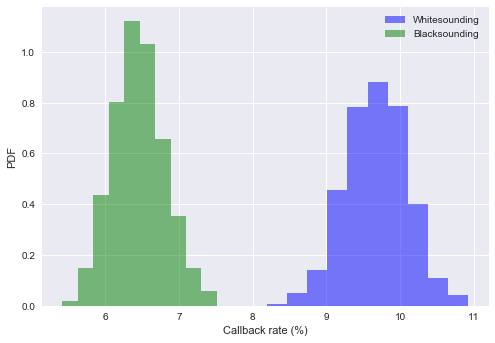

In [115]:
_ = plt.hist(w_bs, color = 'blue', alpha = 0.5, normed = True)
_ = plt.hist(b_bs, color = 'green', alpha = 0.5, normed = True)
_ = plt.xlabel('Callback rate (%)')
_ = plt.ylabel('PDF')
_ = plt.legend(('Whitesounding', 'Blacksounding'))
plt.show()

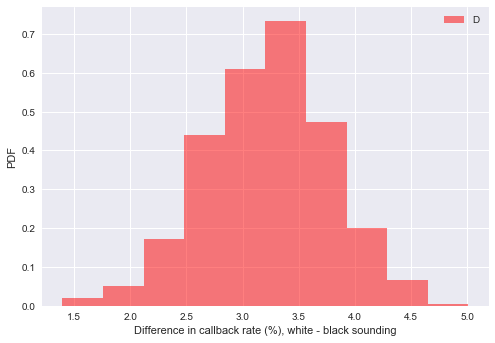

In [124]:
diff = w_bs-b_bs
_ = plt.hist(diff, color = 'red', alpha = 0.5, normed = True)
_ = plt.xlabel('Difference in callback rate (%), white - black sounding')
_ = plt.ylabel('PDF')
_ = plt.legend(('Difference'))
plt.show()

In [125]:
#The 95% confidence level 
np.percentile(diff, [2.5, 97.5])

array([ 2.13501027,  4.29158111])

In [128]:
p = np.sum(diff < 0) / len(diff)
print(p)

0.0


### Summary
The bootstraped callback rates indic